First few rows of the dataset:
   Country  Year  Suicides number  Life expectancy  Adult Mortality  \
0  Albania  2000             54.0             72.6             11.0   
1  Albania  2001            119.0             73.6             14.0   
2  Albania  2002            133.0             73.3             15.0   
3  Albania  2003            124.0             72.8             18.0   
4  Albania  2004            146.0             73.0             17.0   

   Infant deaths  Alcohol  Under-five deaths  HIV/AIDS          GDP  \
0              1     3.66                  1       0.1  1175.788981   
1              1     4.25                  1       0.1  1326.973390   
2              1     3.73                  1       0.1  1453.642777   
3              1     4.29                  1       0.1   189.681557   
4              1     4.54                  1       0.1  2416.588235   

   Population  Income composition of resources  Schooling  
0     38927.0                            0.656       10

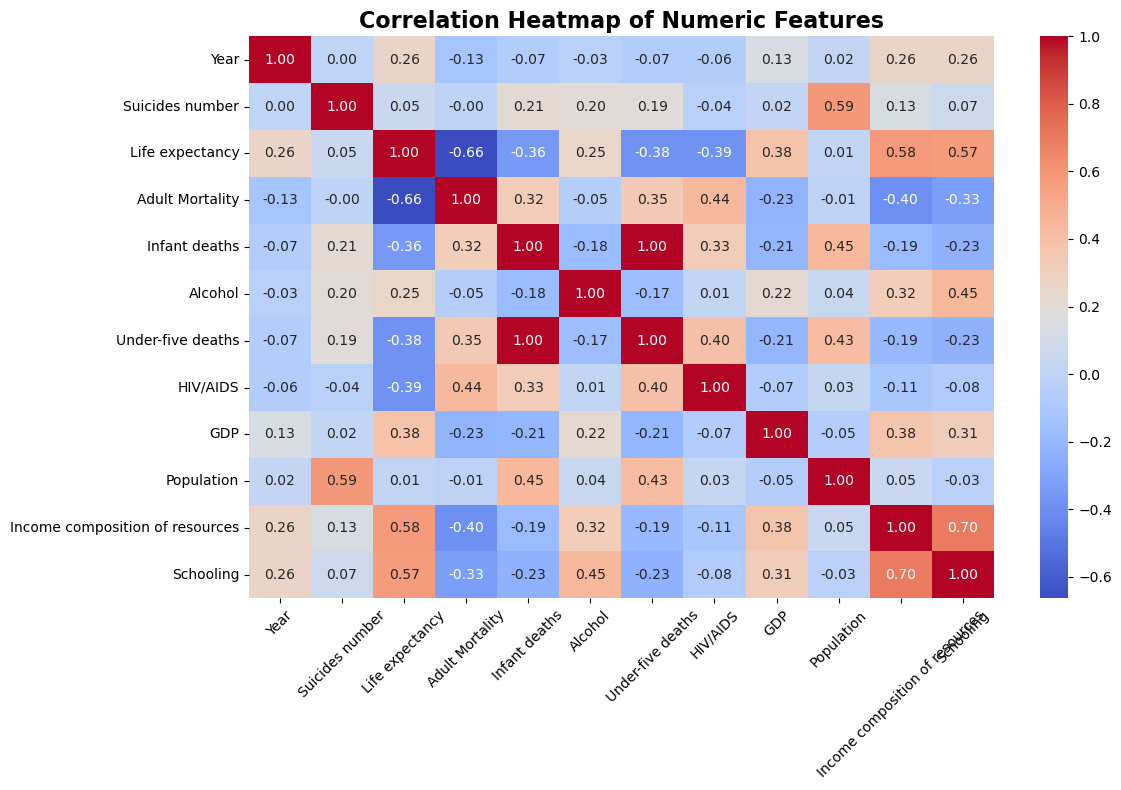

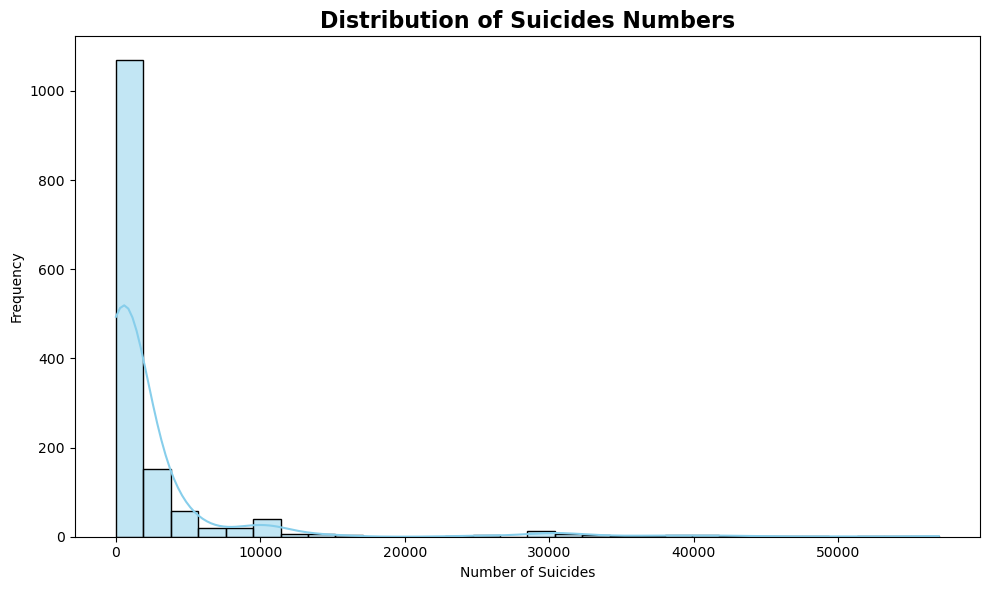

C:\Users\subha\AppData\Local\Temp\ipykernel_19444\1886540951.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Features', data=melted_df, palette='Set2')


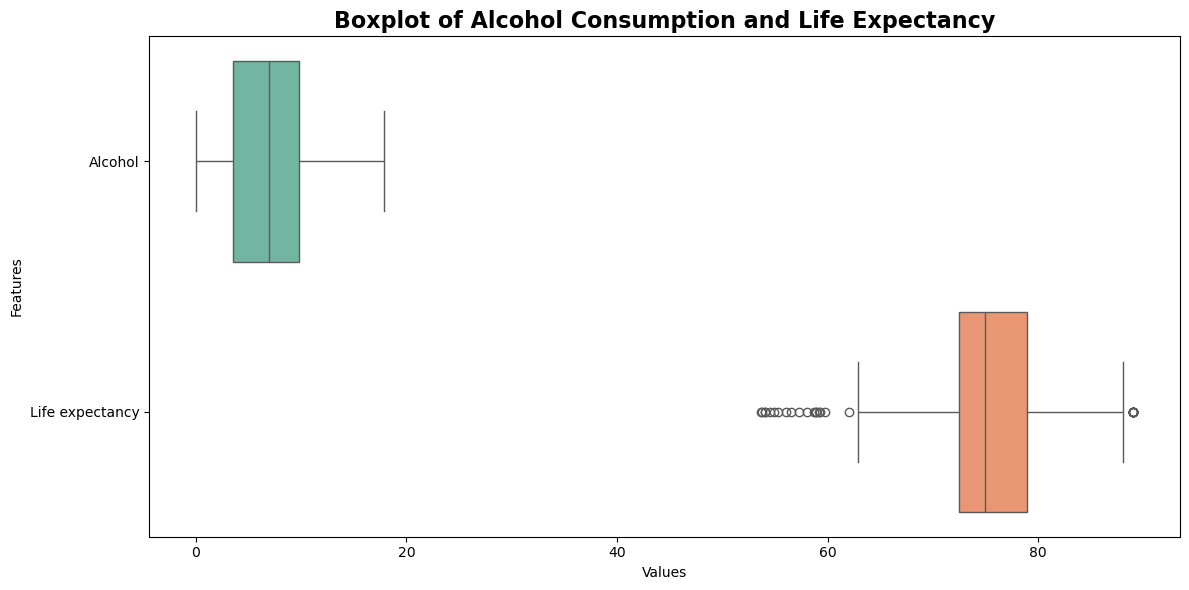

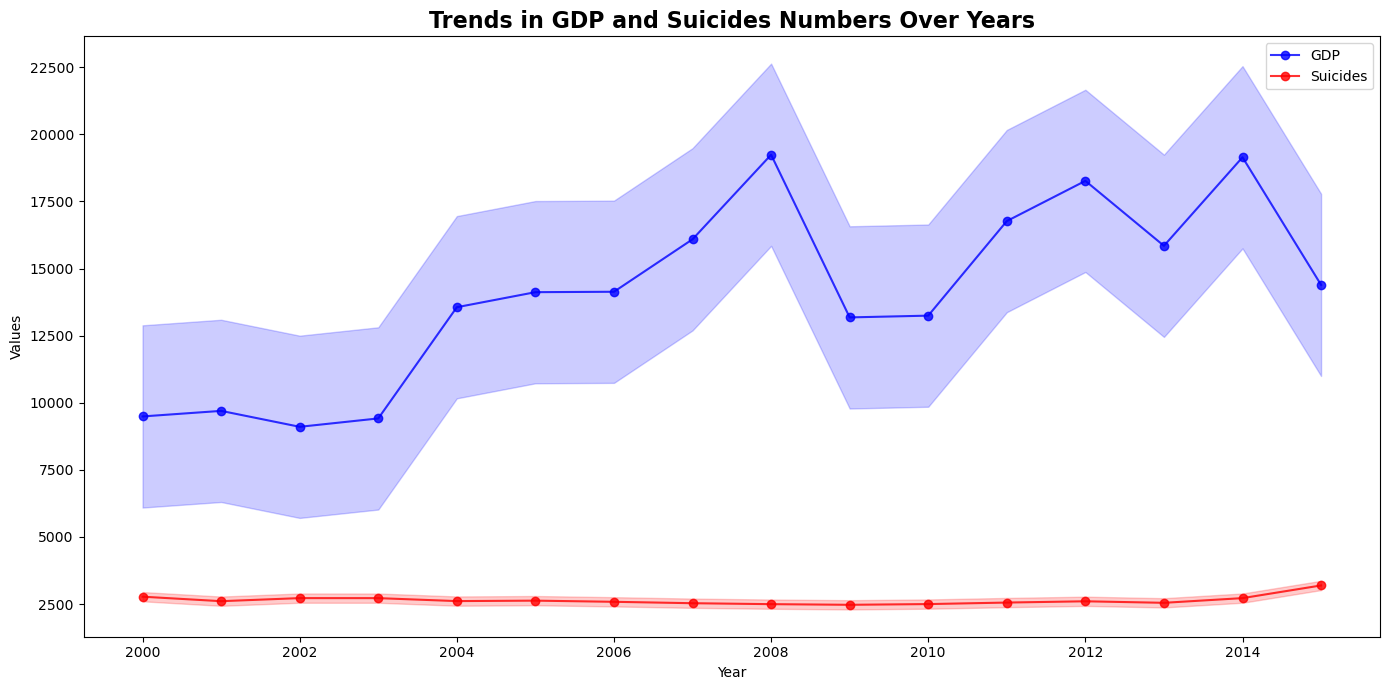

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(file_path):
    """
    Load the dataset into a Pandas DataFrame.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_csv(file_path)

def display_summary_statistics(df):
    """
    Display summary statistics of the dataset.

    Args:
        df (pd.DataFrame): The input dataset.
    """
    print("First few rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    print(df.info())
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    print("\nStatistical Summary:")
    print(df.describe(include='all'))

def plot_correlation_heatmap(df):
    """
    Plot the correlation heatmap of numeric features.

    Args:
        df (pd.DataFrame): The input dataset.
    """
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_suicide_distribution(df):
    """
    Plot the distribution of suicides numbers.

    Args:
        df (pd.DataFrame): The input dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Suicides number'], kde=True, color="skyblue", bins=30)
    plt.title('Distribution of Suicides Numbers', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Suicides')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_boxplot_life_expectancy_and_alcohol(df):
    """
    Plot a boxplot comparing alcohol consumption and life expectancy.

    Args:
        df (pd.DataFrame): The input dataset.
    """
    plt.figure(figsize=(12, 6))
    melted_df = pd.melt(df, value_vars=['Alcohol', 'Life expectancy'], var_name='Features', value_name='Values')
    sns.boxplot(x='Values', y='Features', data=melted_df, palette='Set2')
    plt.title('Boxplot of Alcohol Consumption and Life Expectancy', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_trends_gdp_and_suicides(df):
    """
    Plot trends in GDP and suicide numbers over the years.

    Args:
        df (pd.DataFrame): The input dataset.
    """
    gdp_mean = df.groupby('Year')['GDP'].mean()
    suicides_mean = df.groupby('Year')['Suicides number'].mean()

    plt.figure(figsize=(14, 7))
    plt.plot(gdp_mean.index, gdp_mean, 'b-o', label='GDP', alpha=0.8)
    plt.fill_between(gdp_mean.index, gdp_mean - gdp_mean.std(), gdp_mean + gdp_mean.std(), color='blue', alpha=0.2)

    plt.plot(suicides_mean.index, suicides_mean, 'r-o', label='Suicides', alpha=0.8)
    plt.fill_between(suicides_mean.index, suicides_mean - suicides_mean.std(), suicides_mean + suicides_mean.std(), color='red', alpha=0.2)

    plt.title('Trends in GDP and Suicides Numbers Over Years', fontsize=16, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to execute the analysis and visualization.
    """
    # Loading the dataset
    file_path =r'C:\Users\subha\OneDrive\Desktop\final visualisation report\Global Suicide Rates.csv'  
    df = load_dataset(file_path)

    # Displaying summary statistics
    display_summary_statistics(df)

    # Ploting correlation heatmap
    plot_correlation_heatmap(df)

    # Ploting distribution of suicide numbers
    plot_suicide_distribution(df)

    # Ploting boxplot of alcohol consumption and life expectancy
    plot_boxplot_life_expectancy_and_alcohol(df)

    # Ploting trends in GDP and suicide numbers
    plot_trends_gdp_and_suicides(df)

if __name__ == "__main__":
    main()
